In [ ]:
import numpy as np

file = '/data2/user2/senkang/CP-GuardBench/V2X-Sim-det/test/agent2/5_0/0.npy'

npy = np.load(file,allow_pickle=True)
print(npy)

In [ ]:
import pickle
#####
### analysis pickle data
import matplotlib.pyplot as plt

import torch


with open('/data2/user2/senkang/CP-GuardBench/CP-GuardBench_RawData/generated/5_0.pkl', 'rb') as f:
    data = pickle.load(f)


show_feature_map = False

if show_feature_map:
    fused_feature = torch.zeros(256,32,32).to('cuda')
    for k, v in data.items():
        print(k, v[-1])
        if v[-1] == 1: continue
        fused_feature += v[0]

    fused_feature /= 4
    # feature_map = data[1][0]
    # channel_index = 0



    summed_features = fused_feature.mean(dim=0)
    # 可视化叠加结果
    plt.imshow(summed_features.cpu().numpy(), cmap='plasma')
    plt.colorbar()
    plt.title('Summed Features')
    plt.show()
else:
    feature_map=data[0][0]
    plt.imshow(feature_map.mean(dim=0).cpu().numpy(), cmap='plasma')
    plt.colorbar()
    plt.title('Features')
    plt.show()


In [ ]:
import os
import random
import shutil

def copy_random_files(source_dir, dest_dir, percentage):
    # 确保目标文件夹存在
    os.makedirs(dest_dir, exist_ok=True)

    # 获取源文件夹中的所有文件
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    num_files_to_copy = int(len(files) * percentage)
    # 随机选择指定数量的文件

    selected_files = random.sample(files, num_files_to_copy)

    # 复制文件
    for file_name in selected_files:
        full_file_name = os.path.join(source_dir, file_name)
        shutil.move(full_file_name, dest_dir)
    print(f"已移动 {num_files_to_copy} 个文件到 {dest_dir}")

# 使用示例
source_directory = '/data2/user2/senkang/CP-GuardBench/CP-GuardBench_RawData/test'
destination_directory = '/data2/user2/senkang/CP-GuardBench/CP-GuardBench_RawData/train'
number_of_files_to_copy = 0.85

copy_random_files(source_directory, destination_directory, number_of_files_to_copy)

In [ ]:
### analysis pickle data
import matplotlib.pyplot as plt
import pickle
import torch


with open('/data2/user2/senkang/CP-GuardBench/CP-GuardBench_RawData/generated/8_0.pkl', 'rb') as f:
    data = pickle.load(f)


for k, v in data.items():
    print(k, v[-1])

x = torch.zeros(256,32,32).to('cuda')

print(torch.equal(x, data[5][0]))

0 1
2 1
3 0
4 0
5 0
1 ego
True


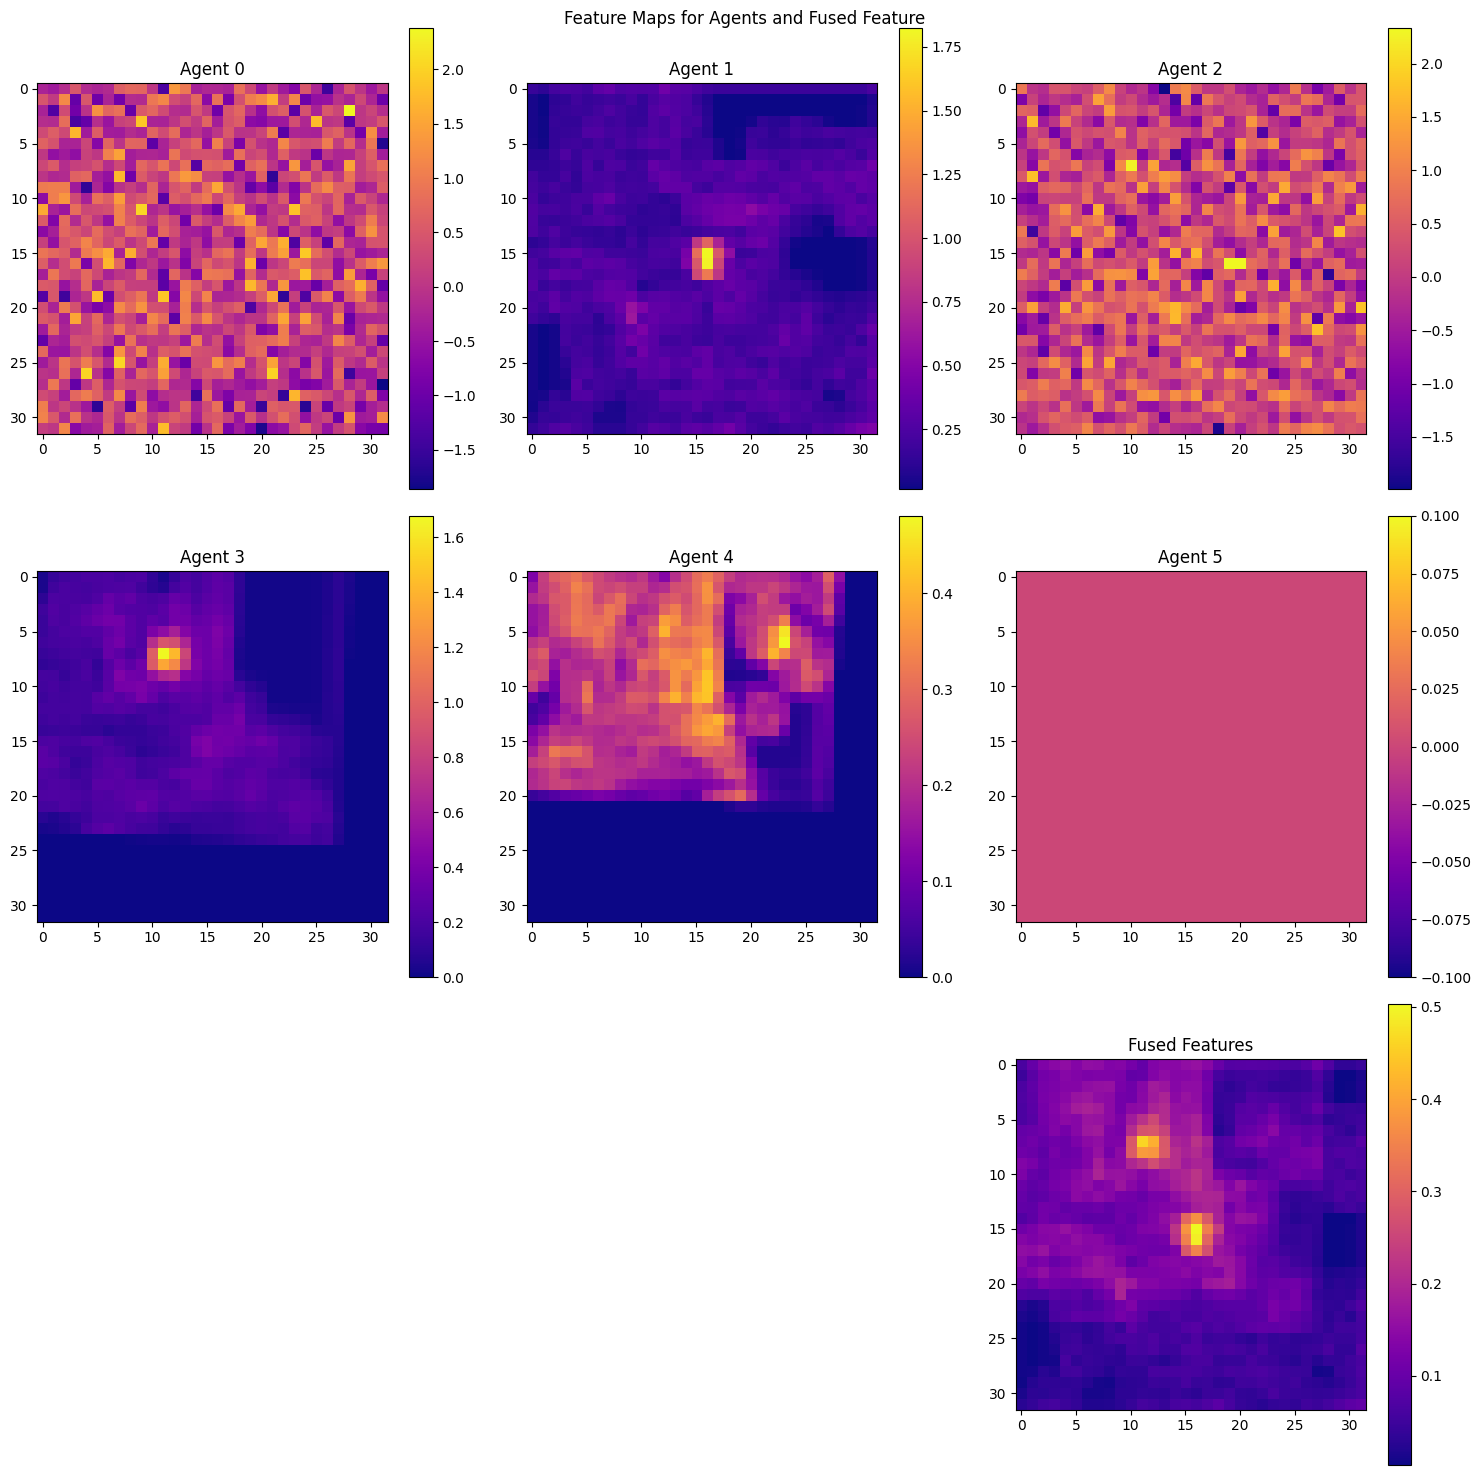

In [36]:
import pickle
#####
### analysis pickle data
import matplotlib.pyplot as plt

import torch


with open('/data2/user2/senkang/CP-GuardBench/CP-GuardBench_RawData/generated/8_22.pkl', 'rb') as f:
    data = pickle.load(f)

# 计算融合的feature map
fused_feature = torch.zeros(256,32,32).to('cuda')
for k, v in data.items():
    print(k, v[-1])
    if v[-1] == 1: continue
    fused_feature += v[0]
fused_feature /= len(data) - 1  # Subtract 1 to account for the ego agent

print(torch.equal(data[5][0], torch.zeros(256, 32,32).to('cuda')))


# 计算需要的行数和列数
num_agents = len(data)
num_cols = 3  # 每行3个子图
num_rows = (num_agents + 1) // num_cols + 1  # +1 为融合特征图预留空间

# 创建子图布局
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Feature Maps for Agents and Fused Feature')

# 显示每个agent的feature map
for i in range(num_agents):
    row = i // num_cols
    col = i % num_cols
    feature_map = data[i][0]
    im = axs[row, col].imshow(feature_map.mean(dim=0).cpu().numpy(), cmap='plasma')
    axs[row, col].set_title(f'Agent {i}')
    fig.colorbar(im, ax=axs[row, col])

# 显示融合的feature map
fused_features = fused_feature.mean(dim=0)
im = axs[-1, -1].imshow(fused_features.cpu().numpy(), cmap='plasma')
axs[-1, -1].set_title('Fused Features')
fig.colorbar(im, ax=axs[-1, -1])

# 移除多余的子图
for i in range(num_agents, num_rows * num_cols - 1):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

